In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c_med = '#008B8B'

In [2]:
excel_cfc = pd.read_excel('./excel/copia_Cursos CFC.xlsx', index_col=0)
print(excel_cfc.shape)
excel_cfc.head()

(52, 3)


,CR,H,CURSO
0,4.6,50,Atención integral a la embarazada de bajo riesgo
1,8.8,70,Atención Inicial al accidentado pediátrico
2,4.7,35,Antibioterapia básica
3,7.1,70,Complicaciones durante el embarazo
4,5.7,40,Actualización en COVID-19


In [3]:
excel_raw = pd.read_excel('./excel/copia_pedidos.xlsx', parse_dates=['Order Date'])
print(excel_raw.shape)
excel_raw.head()

(490328, 6)


,Order ID,Order Date,Current Value,Product,Coupon Code,User ID
0,401649,2017-06-28,19.0,Antibioterapia Básica para Médicos,ofer19stx,1593954
1,401641,2017-06-28,19.0,Antibioterapia Básica para TCAEs,ofer19stx,1880812
2,401632,2017-06-28,19.0,Antibioterapia Básica para Médicos,ofer19stx,1880759
3,401631,2017-06-28,19.0,Antibioterapia Básica para Médicos,ofer19stx,1872887
4,401588,2017-06-28,19.0,Antibioterapia Básica para TCAEs,ofer19stx,1880574


<div style = 'color:gold'>

<br>

# Descripción de las columnas

</div>

### Archivo Cursos CFC
- **CR** = Créditos que tiene el curso.
- **H** = Horas de duración del curso.
- **CURSO** = Nombre completo del curso.



In [4]:
# No hay valores nulos

excel_cfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CR      52 non-null     float64
 1   H       52 non-null     int64  
 2   CURSO   52 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


In [5]:
# No hay valores repetidos en la columna "CURSO" (columna con valores únicos)

excel_cfc.astype(str).describe()

,CR,H,CURSO
count,52,52,52
unique,36,10,52
top,3.3,25,Atención integral a la embarazada de bajo riesgo
freq,4,9,1


In [6]:
excel_cfc.describe()

,CR,H
count,52.000000,52.000000
mean,5.357692,41.346154
std,2.190026,17.408455
min,0.000000,0.000000
25%,3.475000,30.000000
50%,5.250000,42.500000
75%,7.100000,50.000000
max,9.100000,70.000000


<br>

### Archivo Pedidos
- **Order ID** = Número ID de la orden.
- **Order Date** = Fecha en la que se produjo la orden.
- **Current Value** = Coste de la formación en la fecha que se produjo la orden.
- **Product** = Nombre de la formación.
- **Coupon Code** = Cupón utilizado en la orden.
- **User ID** = Número ID del usuario que completó la orden.

In [7]:
# las columnas "Product" y "Coupon Code" tienen valores nulos

excel_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490328 entries, 0 to 490327
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Order ID       490328 non-null  int64         
 1   Order Date     490328 non-null  datetime64[ns]
 2   Current Value  490328 non-null  float64       
 3   Product        490152 non-null  object        
 4   Coupon Code    5027 non-null    object        
 5   User ID        490328 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 22.4+ MB


In [8]:
# En el 80% de las órdenes el precio de la formación fue de 0€
# La columna 'Order ID' sólo tiene valroes únicos

excel_raw.astype(str).describe()

,Order ID,Order Date,Current Value,Product,Coupon Code,User ID
count,490328,490328,490328,490328,490328,490328
unique,490328,2307,81,244,87,208688
top,401649,2020-03-25,0.0,HPV: Cribado del Cáncer de Cérvix,nan,10586797
freq,1,5807,394978,48875,485301,45


In [9]:
# La base de datos estática tiene data desde Marzo de 2017 hasta Septiembre de 2023
# El percentil 75% re-afirma que, en la distribución de los datos, +75% tienen un valor de "0" en la columna "Current Value"
# En la columna "Current value" el valor máximo es "1.350". ¿Es posible que alguien se gastara tal cantidad en formación online en una única orden?

excel_raw.describe()

,Order ID,Order Date,Current Value,User ID
count,4.903280e+05,490328,490328.000000,4.903280e+05
mean,2.072783e+07,2020-12-06 07:43:10.383580160,8.114763,2.694610e+07
min,2.609620e+05,2017-03-02 00:00:00,0.000000,2.143840e+05
25%,4.621948e+06,2019-11-18 00:00:00,0.000000,5.558889e+06
50%,1.664680e+07,2020-09-03 00:00:00,0.000000,1.330161e+07
75%,3.747558e+07,2022-03-01 00:00:00,0.000000,3.614251e+07
max,6.203539e+07,2023-09-13 00:00:00,1350.000000,1.822010e+08
std,1.703942e+07,NaN,23.113580,3.160810e+07


<div style = 'color:gold'>

<br>

# Procesar archivo CFC

</div>

In [10]:
excel_cfc_copy = excel_cfc.copy()

<br>

### Cambiar nombre columnas

In [11]:
excel_cfc_copy = excel_cfc_copy.rename({'CURSO': 'Course'}, axis=1)

excel_cfc_copy.columns

Index(['CR', 'H', 'Course'], dtype='object')

<br>

### Transformar texto

In [12]:
excel_cfc_copy['Course'] = excel_cfc_copy['Course'].str.title().str.strip()

print('¿Hay valores duplicados tras la transformación?:', excel_cfc_copy.duplicated().any())
excel_cfc_copy.head()

¿Hay valores duplicados tras la transformación?: False


,CR,H,Course
0,4.6,50,Atención Integral A La Embarazada De Bajo Riesgo
1,8.8,70,Atención Inicial Al Accidentado Pediátrico
2,4.7,35,Antibioterapia Básica
3,7.1,70,Complicaciones Durante El Embarazo
4,5.7,40,Actualización En Covid-19


<br>

### Añadir categorías

In [13]:
dict_categorias = {
    'Mujer': ['Violencia De Género', 'Complicaciones Durante El Embarazo', 'Atención Integral A La Embarazada De Bajo Riesgo', 'Menopausia', 'Lactancia Materna',
              'Hpv: Cribado Del Cáncer De Cérvix', 'Fibromialgia Y Dolor De La Actividad'],
    
    'Pediatría': ['Atención Inicial Al Accidentado Pediátrico', 'Urgencias Pediátricas', 'Abordaje Del Paciente Oncológico Pediátrico', 
                  'Actualización En Neonatología', 'Planificación Familiar', 'Tdah: Trastorno Por Déficit De Atención E Hiperactividad'],
    
    'Digestivo': ['Nutrición En La Enfermedad Inflamatoria Intestinal', 'Nutrición En El Síndrome De Intestino Irritable', 'Atención Integral Del Paciente Con Obesidad',
                  'Abordaje Psicológico Y Nutricional En Los Trastornos De Alimentación', 'Atención Integral Del Paciente Con Diabetes Mellitus', 
                  'Abordaje Integral Del Paciente Con Disfagia', 'Introducción A La Enfermería En Endoscopia Digestiva', 'Urgencias Digestivas Y Del Sistema Urinario'],
    
    'Urgencias': ['Técnicas Invasivas En Urgencias Y Emergencias', 'Urgencias Obstétricas Extrahospitalarias', 'Urgencias Oftalmológicas', 'Urgencias Respiratorias', 
                  'Cuidados Paliativos', 'Cuidados Intensivos Cardiovasculares', 'Cuidados Intensivos Respiratorios', 'Abordaje Del Paciente Politraumatizado En Uci', 
                  'Atención Al Paciente Politraumatizado Y Grandes Quemados', 'Actualización En Incidentes Con Múltiples Víctimas Y Catástrofes', 
                  'Manejo Integral De La Vía Aérea Difícil'],
    
    'Enfermería Básica': ['Antibioterapia Básica', 'Radiología Básica', 'Soporte Vital Básico', 'Soporte Vital Avanzado', 'Vendajes Funcionales', 'Electrocardiografía',
                          'Evaluación Y Tratamiento De Úlceras Por Presión', 'Actualización En Covid-19', 'Lesiones Deportivas', 'Curso Completo De Diálisis Peritoneal', 
                          'Infecciones Relacionadas Con La Asistencia Sanitaria', 'Actualización En Medicina Interna', 'Nuevas Adicciones',
                          'Introducción Al Powerpoint Para Profesionales Sanitarios', 'Introducción A Los Sistemas De Gestión De Imagen Médica Digital'],
    
    'Geriatría': ['Introducción A La Geriatría', 'Avances En Geriatría', 'Valoración Geriátrica Integral'],
    
    'Gestión': ['Tecnologías De La Información En Entornos Sanitarios', 'Introducción A La Investigación Sociosanitaria']
}



# Comprobar que se encuentran los 57 cursos
lista_add = []
for key, value in dict_categorias.items():
    for n in value:
        lista_add.append(n)
    
print('¿Cuántas cursos hay en el diccionario?:', len(lista_add))

¿Cuántas cursos hay en el diccionario?: 52


In [14]:
excel_cfc_categories = excel_cfc_copy.copy()

condition = [
    excel_cfc_copy['Course'].isin(dict_categorias['Mujer']),
    excel_cfc_copy['Course'].isin(dict_categorias['Pediatría']),
    excel_cfc_copy['Course'].isin(dict_categorias['Digestivo']),
    excel_cfc_copy['Course'].isin(dict_categorias['Urgencias']),
    excel_cfc_copy['Course'].isin(dict_categorias['Enfermería Básica']),
    excel_cfc_copy['Course'].isin(dict_categorias['Geriatría']),
    excel_cfc_copy['Course'].isin(dict_categorias['Gestión']),
]

options = ['Mujer', 'Pediatría', 'Digestivo', 'Urgencias', 'Enfermería Básica', 'Geriatría', 'Gestión']

excel_cfc_categories['Category'] = np.select(condition, options, default=np.nan)

print(excel_cfc_categories.shape)
print('¿Hay valores nulos en "Category"?:', excel_cfc_categories['Category'].isna().any())
excel_cfc_categories.head()

(52, 4)
¿Hay valores nulos en "Category"?: False


,CR,H,Course,Category
0,4.6,50,Atención Integral A La Embarazada De Bajo Riesgo,Mujer
1,8.8,70,Atención Inicial Al Accidentado Pediátrico,Pediatría
2,4.7,35,Antibioterapia Básica,Enfermería Básica
3,7.1,70,Complicaciones Durante El Embarazo,Mujer
4,5.7,40,Actualización En Covid-19,Enfermería Básica


<br>

### Plotear gráficos

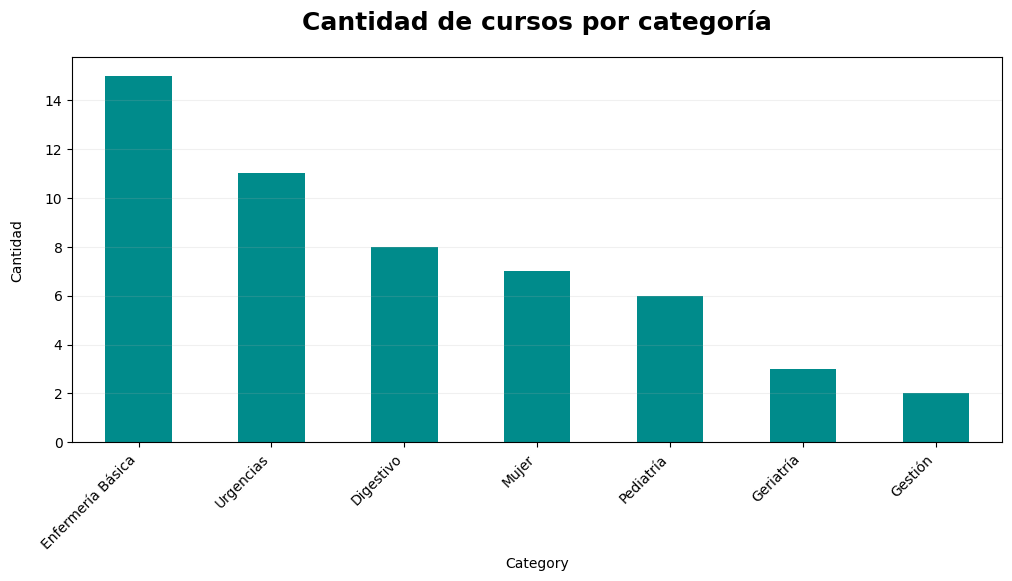

In [47]:
categorias = excel_cfc_categories['Category'].value_counts()

categorias.plot(kind='bar', color=c_med, figsize=(12, 5))
plt.title('Cantidad de cursos por categoría', fontsize=18, fontweight='bold', y=1.05)
plt.ylabel('Cantidad', labelpad=15)
plt.grid(axis='y', alpha=0.18)
plt.xticks(rotation=45, ha='right');

<div style = 'color:gold'>

<br>

# Procesar archivo Pedidos

</div>

In [16]:
excel_raw_copy = excel_raw.copy()

<br>

### Transformar texto

In [17]:
excel_raw_copy['Product'] = excel_raw_copy['Product'].str.title().str.strip()

excel_raw_copy.head()

,Order ID,Order Date,Current Value,Product,Coupon Code,User ID
0,401649,2017-06-28,19.0,Antibioterapia Básica Para Médicos,ofer19stx,1593954
1,401641,2017-06-28,19.0,Antibioterapia Básica Para Tcaes,ofer19stx,1880812
2,401632,2017-06-28,19.0,Antibioterapia Básica Para Médicos,ofer19stx,1880759
3,401631,2017-06-28,19.0,Antibioterapia Básica Para Médicos,ofer19stx,1872887
4,401588,2017-06-28,19.0,Antibioterapia Básica Para Tcaes,ofer19stx,1880574


<br>

### Eliminar filas innecesarias

Eliminar la fila `Order ID` porque son valores únicos que no aportan nada de información.

Eliminar, también, la columna `Coupon Code` porque no es relevante.

In [18]:
excel_drop = excel_raw_copy.copy()

excel_drop = excel_drop.drop(['Order ID', 'Coupon Code'], axis=1)

print('Shape ANTES de dropear columnas:', excel_raw_copy.shape)
print('Shape DESPUÉS de dropear columnas:', excel_drop.shape)

Shape ANTES de dropear columnas: (490328, 6)
Shape DESPUÉS de dropear columnas: (490328, 4)


<br>

### Tratar los valores nulos

Eliminar valores nulos de la columna `Product`.

In [19]:
excel_na = excel_drop.copy()

excel_na = excel_na[~excel_na['Product'].isna()]
excel_na = excel_na.reset_index(drop=True)

print('Shape ANTES de eliminar valores nulos:', excel_drop.shape)
print('Shape DESPUÉS de eliminar valores nulos:', excel_na.shape, end='\n\n')

excel_na.info()

Shape ANTES de eliminar valores nulos: (490328, 4)
Shape DESPUÉS de eliminar valores nulos: (490152, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490152 entries, 0 to 490151
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Order Date     490152 non-null  datetime64[ns]
 1   Current Value  490152 non-null  float64       
 2   Product        490152 non-null  object        
 3   User ID        490152 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 15.0+ MB


<br>

### Observar valores en la columna `product`

In [20]:
med_formaciones = excel_na.groupby('Product').size().index

print('¿Cuántos cursos hay en la columna "Product"?:', len(med_formaciones))
med_formaciones[:5]

¿Cuántos cursos hay en la columna "Product"?: 243


Index(['Abordaje Del Paciente Oncológico Pediátrico',
       'Abordaje Del Paciente Oncológico Pediátrico - Meval',
       'Abordaje Del Paciente Politraumatizado En Uci',
       'Abordaje Integral Del Paciente Con Disfagia',
       'Abordaje Psicológico Y Nutricional De Los Problemas De Alimentación'],
      dtype='object', name='Product')

<br>

Hay cursos que se encuentran repetidos, pero porque son variaciones de la formación o porque pertenecen a cursos externos a Medicarama.

<br>

### Limpiar Órdenes que pertenecen a formaciones externas a Medicarama

In [21]:
excel_row = excel_na.copy()

In [22]:
lista_eliminar = ['Uecm', 'Universitario', 'Máster', 'Pago', 'Deleted', 'Webinar', 'Reserva', 'Tfg', 'Meval']

print('¿Qué valores de la lista se encuentran en la columna "Product"?\n')
for valor in lista_eliminar:
    lista_prov = [prod for prod in med_formaciones if valor in prod]
    if len(lista_prov) > 0:
        print(f'{valor}: SÍ')
    else:
        print(f'{valor}: NO')

¿Qué valores de la lista se encuentran en la columna "Product"?

Uecm: SÍ
Universitario: SÍ
Máster: SÍ
Pago: SÍ
Deleted: SÍ
Webinar: SÍ
Reserva: SÍ
Tfg: SÍ
Meval: SÍ


In [23]:
excel_row = excel_row[~excel_row['Product'].str.contains('|'.join(lista_eliminar))]

print('Número de formaciones que habían antes de los cambios:', len(med_formaciones))
print('Número de formaciones que hay ahora:', len(excel_row['Product'].value_counts()))

Número de formaciones que habían antes de los cambios: 243
Número de formaciones que hay ahora: 210


<br>

### Reemplazar nombres de algunas formaciones para que coincidan al mergear ambos Excels

In [24]:
excel_replace = excel_row.copy()

In [25]:
dict_reemplazar = {
    'Actualización En Pandemia Por Coronavirus': 'Actualización En Covid-19',
    'Valoración Geriatrica Integral': 'Valoración Geriátrica Integral',
    'Nutrición Para El Síndrome Intestino Irritable (Sii)': 'Nutrición En El Síndrome De Intestino Irritable',
    'Nutrición Para La Enfermedad Inflamatoria Intestinal (Eii)': 'Nutrición En La Enfermedad Inflamatoria Intestinal',
    'Fibromialgia Y Dolor Crónico': 'Fibromialgia Y Dolor De La Actividad',
    'Fibromialgia Y Dolor Crónico Para Enfermeros/As': 'Fibromialgia Y Dolor De La Actividad Para Enfermeros/As',
    'Fibromialgia Y Dolor Crónico Para Fisioterapeutas': 'Fibromialgia Y Dolor De La Actividad Para Fisioterapeutas',
    'Fibromialgia Y Dolor Crónico Para Médicos': 'Fibromialgia Y Dolor De La Actividad Para Médicos',
    'Fibromialgia Y Dolor Crónico Para Psicólogos/As': 'Fibromialgia Y Dolor De La Actividad Para Psicólogos/As',
    'Fibromialgia Y Dolor Crónico Para Terapeutas Ocupacionales': 'Fibromialgia Y Dolor De La Actividad Para Terapeutas Ocupacionales',
    'Fibromialgia Y Dolor Crónico Para Técnicos-Auxiliares De Farmacia Y Técnicos En Farmacia Y Parafarmacia': 'Fibromialgia Y Dolor De La Actividad Para Técnicos-Auxiliares De Farmacia Y Técnicos En Farmacia Y Parafarmacia',
    'Neonatología Para Enfermeros/As': 'Actualización En Neonatología Para Enfermeros/As',
    'Neonatología Para Fisioterapeutas': 'Actualización En Neonatología Para Fisioterapeutas',
    'Neonatología Para Médicos': 'Actualización En Neonatología Para Médicos',
    'Neonatología Para Tcaes': 'Actualización En Neonatología Para Tcaes',
    'Neonatología Para Tes': 'Actualización En Neonatología Para Tes',
    'Neonatología Para Técnicos Auxiliares De Farmacia': 'Actualización En Neonatología Para Técnicos Auxiliares De Farmacia',
    'Tdah - Trastorno Por Déficit De Atención E Hiperactividad': 'Tdah: Trastorno Por Déficit De Atención E Hiperactividad',
    'Tdah - Trastorno Por Déficit De Atención E Hiperactividad Para Enfermeros/As': 'Tdah: Trastorno Por Déficit De Atención E Hiperactividad Para Enfermeros/As',
    'Tdah - Trastorno Por Déficit De Atención E Hiperactividad Para Médicos': 'Tdah: Trastorno Por Déficit De Atención E Hiperactividad Para Médicos',
    'Tdah - Trastorno Por Déficit De Atención E Hiperactividad Para Psicólogos/As': 'Tdah: Trastorno Por Déficit De Atención E Hiperactividad Para Psicólogos/As',
    'Tdah - Trastorno Por Déficit De Atención E Hiperactividad Para To': 'Tdah: Trastorno Por Déficit De Atención E Hiperactividad Para To',
    'Tecnologías De La Información En Entorno Sanitario': 'Tecnologías De La Información En Entornos Sanitarios',
    'Introducción Al Manejo De La Vía Aérea Difícil': 'Introducción Al Manejo Integral De La Vía Aérea Difícil',
    'Atención Integral Al Paciente Con Diabetes Mellitus': 'Atención Integral Del Paciente Con Diabetes Mellitus',
    'Atención Integral Al Paciente Con Obesidad': 'Atención Integral Del Paciente Con Obesidad',
    'Actuación En Incidentes Con Múltiples Víctimas Y Catástrofes': 'Actualización En Incidentes Con Múltiples Víctimas Y Catástrofes',
    'Abordaje Psicológico Y Nutricional De Los Problemas De Alimentación': 'Abordaje Psicológico Y Nutricional En Los Trastornos De Alimentación'
}

In [26]:
excel_replace['Product'] = excel_replace['Product'].replace(dict_reemplazar)

<br>

### ¿Quedan formaciones que necesiten alguna transformación?

In [27]:
listado_cursos = excel_cfc_categories.groupby('Course').size().index
cursos = excel_replace[~excel_replace['Product'].str.contains('|'.join(listado_cursos))]
cursos['Product'].value_counts(ascending=False).index

Index(['Pack 2 Cursos', 'Pack 3 Cursos', 'Pack 4 Cursos', 'Pack 6 Cursos',
       'Pack De Estudiantes - S', 'Pack De La Mujer',
       'Pack 3 Cursos Asociaciones'],
      dtype='object', name='Product')

Son packs de formación, por lo que añadiré una catergoría exclusivamente para estas filas llamada: `packs`

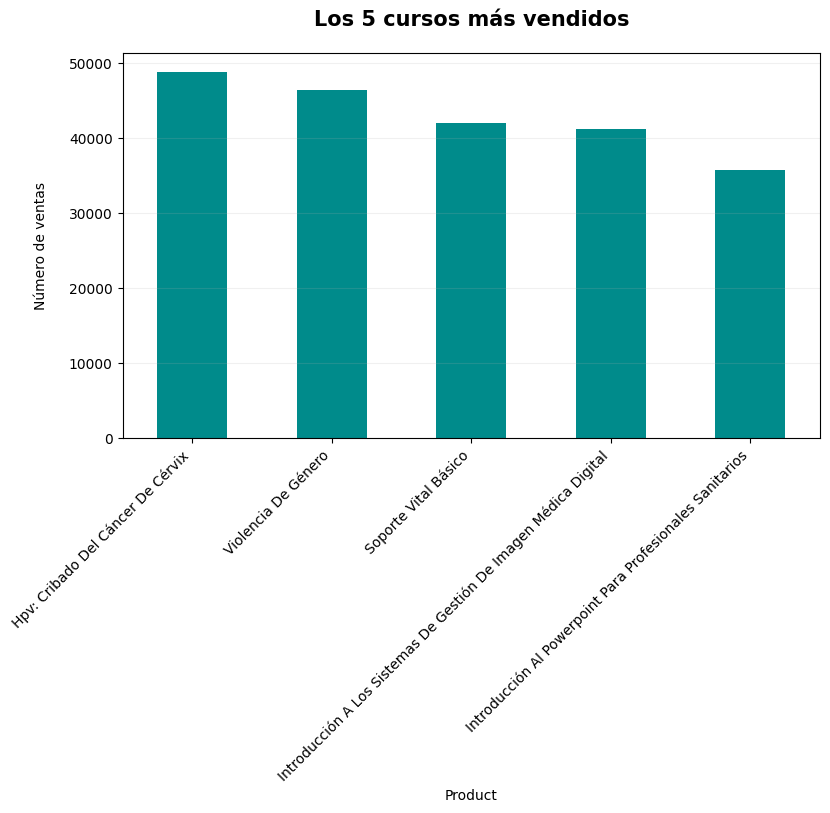

In [48]:
Productos_mas_vendidos = excel_replace['Product'].value_counts().head(5)

Productos_mas_vendidos.plot(kind='bar', color=c_med, figsize=(9, 5))
plt.title('Los 5 cursos más vendidos', fontsize=15, fontweight='bold', y=1.05)
plt.ylabel('Número de ventas', labelpad=15)
plt.grid(axis='y', alpha=0.18)
plt.xticks(rotation=45, ha='right');

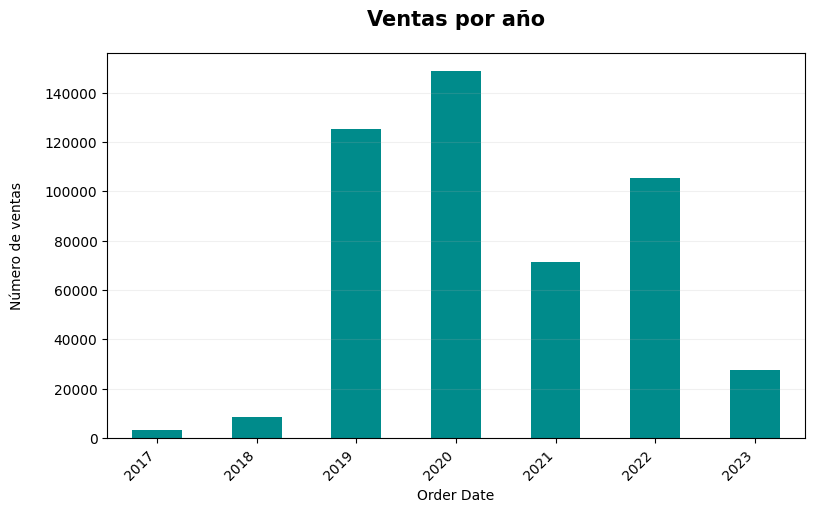

In [53]:
ventas_anuales = excel_replace.groupby(excel_replace['Order Date'].dt.year).size()

ventas_anuales.plot(kind='bar', color=c_med, figsize=(9, 5))
plt.title('Ventas por año', fontsize=15, fontweight='bold', y=1.05)
plt.ylabel('Número de ventas', labelpad=15)
plt.grid(axis='y', alpha=0.18)
plt.xticks(rotation=45, ha='right');

<div style = 'color:gold'>

<br>

# Mergear ambos archivos

</div>

<br>

### Creo listas donde alamacenar los cursos y los productos y poderlos agrupar

In [28]:
cursos = excel_cfc_categories.copy()
productos = excel_replace.copy()

In [29]:
lista_cursos = cursos['Course'].values
lista_productos = productos.groupby('Product').size().index

print(len(lista_cursos))
print(len(lista_productos))

52
209


<br>

### Agrupo cada producto (formación) a su respectivo curso

In [30]:
# Agrupo en un diccionario a qué curso pertenece cada producto
dict_curso = {}

for curso in lista_cursos:
    for prod in lista_productos:
        if curso in prod:
            dict_curso[prod] = curso
print('Número de items (clave-valor) en el diccionario:', len(dict_curso.items()), end='\n\n')   

# Muestro por pantalla cómo quedan los primeros cinco clave-valor del diccionario
for i, (key, value) in enumerate(dict_curso.items()):
    print(f'{key}: {value}')
    if i > 5:
        break

Número de items (clave-valor) en el diccionario: 202

Atención Integral A La Embarazada De Bajo Riesgo: Atención Integral A La Embarazada De Bajo Riesgo
Atención Inicial Al Accidentado Pediátrico: Atención Inicial Al Accidentado Pediátrico
Antibioterapia Básica: Antibioterapia Básica
Antibioterapia Básica Para Enfermeros/As: Antibioterapia Básica
Antibioterapia Básica Para Farmacéuticos/As: Antibioterapia Básica
Antibioterapia Básica Para Fisioterapeutas: Antibioterapia Básica
Antibioterapia Básica Para Médicos: Antibioterapia Básica


<br>

### Creo un dataframe provisional del diccinario anterior antes del merge

In [31]:
df_prov = pd.DataFrame({key:[value] for key, value in dict_curso.items()})
df_prov = df_prov.T.reset_index()
df_prov = df_prov.rename({'index': 'Reference', 0: 'Course'}, axis=1)

print('Número de filas del dataframe:', len(df_prov))
df_prov.head()

Número de filas del dataframe: 202


,Reference,Course
0,Atención Integral A La Embarazada De Bajo Riesgo,Atención Integral A La Embarazada De Bajo Riesgo
1,Atención Inicial Al Accidentado Pediátrico,Atención Inicial Al Accidentado Pediátrico
2,Antibioterapia Básica,Antibioterapia Básica
3,Antibioterapia Básica Para Enfermeros/As,Antibioterapia Básica
4,Antibioterapia Básica Para Farmacéuticos/As,Antibioterapia Básica


<br>

### Mergear ambos dataframes: "productos" & "df_prov"

In [32]:
# Mergear la columna cursos
merge = productos.merge(right=df_prov, left_on='Product', right_on='Reference', how='left')
merge = merge.drop('Reference', axis=1)

# Mergear la columna categorías
merge = merge.merge(right=cursos, on='Course', how='left')

user = merge.pop('User ID')
merge.insert(0, 'User ID', user)
merge = merge.sort_values(by='Order Date', ascending=True)
merge = merge.reset_index(drop=True)

print(merge.shape)
merge.head()

(489759, 8)


,User ID,Order Date,Current Value,Product,Course,CR,H,Category
0,1150817,2017-03-02,5.0,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,9.0,70.0,Enfermería Básica
1,1255116,2017-03-22,0.0,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,9.0,70.0,Enfermería Básica
2,1280376,2017-03-27,5.0,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,9.0,70.0,Enfermería Básica
3,1282143,2017-03-27,5.0,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,9.0,70.0,Enfermería Básica
4,1282191,2017-03-27,5.0,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,9.0,70.0,Enfermería Básica


In [33]:
# La columna "Course" tiene valores nulos

merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489759 entries, 0 to 489758
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User ID        489759 non-null  int64         
 1   Order Date     489759 non-null  datetime64[ns]
 2   Current Value  489759 non-null  float64       
 3   Product        489759 non-null  object        
 4   Course         466327 non-null  object        
 5   CR             466327 non-null  float64       
 6   H              466327 non-null  float64       
 7   Category       466327 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 29.9+ MB


In [34]:
productos_sin_curso = merge[merge['Course'].isna()]['Product'].unique()

print('Estos son los productos que no tienen valores en la columna "Course":', end='\n\n')
for producto in productos_sin_curso:
    print(producto)

Estos son los productos que no tienen valores en la columna "Course":

Pack 4 Cursos
Pack 3 Cursos
Pack 2 Cursos
Pack 3 Cursos Asociaciones
Pack 6 Cursos
Pack De La Mujer
Pack De Estudiantes - S


<br>

### Rellenar los valores de "Pack"

In [35]:
merge_pack = merge.copy()

# Rellenar los valores de "Pack" donde hayan valores nulos en la columna "Course"
merge_pack['Course'] = np.where(merge_pack['Course'].isna(), 'Pack', merge_pack['Course'])
merge_pack['CR'] = np.where(merge_pack['CR'].isna(), 0, merge_pack['CR'])
merge_pack['H'] = np.where(merge_pack['H'].isna(), 0, merge_pack['H'])
merge_pack['Category'] = np.where(merge_pack['Category'].isna(), 'Pack', merge_pack['Category'])

merge_pack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489759 entries, 0 to 489758
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User ID        489759 non-null  int64         
 1   Order Date     489759 non-null  datetime64[ns]
 2   Current Value  489759 non-null  float64       
 3   Product        489759 non-null  object        
 4   Course         489759 non-null  object        
 5   CR             489759 non-null  float64       
 6   H              489759 non-null  float64       
 7   Category       489759 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 29.9+ MB


In [36]:
print('Número de cursos en la columna "Course":', len(merge_pack['Course'].unique()))

Número de cursos en la columna "Course": 52


<br>

### Ordenar las columnas del dataset

In [57]:
merge_reorder = merge_pack.copy()

In [58]:
# Guardo la columna en una variable
cv = merge_reorder.pop('Current Value')
cat = merge_reorder.pop('Category')

# Guardo la posición de la columna de referencia
loc_course = merge_reorder.columns.get_loc('Course')

# Reordeno las columnas
merge_reorder.insert(loc_course +1, 'Category', cat)
merge_reorder['Current Value'] = cv

merge_reorder.head()

,User ID,Order Date,Product,Course,Category,CR,H,Current Value
0,1150817,2017-03-02,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0
1,1255116,2017-03-22,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,0.0
2,1280376,2017-03-27,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0
3,1282143,2017-03-27,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0
4,1282191,2017-03-27,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0


<br>

# Guardar como CSV

In [59]:
merge_reorder.to_csv('./preprocessed/preprocessed_data.csv')